## Feature Importance Analysis

Objective: Identify key features impacting popularity and genre.
Results: Ranked list of important features with interpretability using methods
like SHAP values, highlighting their influence on the outcomes.

## Feature importance analysis for Popularity Prediction

In [ ]:
# Load the data
import pandas as pd
df= pd.read_pickle("/content/drive/MyDrive/Audio_Genre_ML/df_with_clusters.pkl")

In [ ]:
popularity_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature', 'cluster'  # add cluster
]

In [ ]:
import joblib

model = joblib.load("/content/drive/MyDrive/Audio_Genre_ML/rf_popularity_cluster.pkl")

## SHAP Analysis

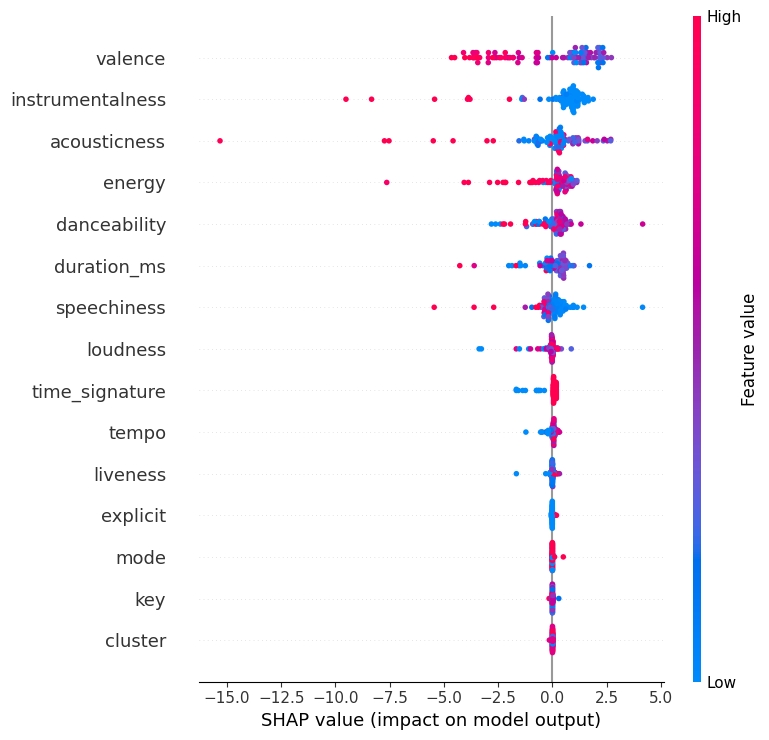

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Feature matrix and target
X = df[popularity_features]
y = df['popularity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import shap

# Step 1: Smaller model for SHAP
rf_small = RandomForestRegressor(n_estimators=20, max_depth=6, random_state=42)
rf_small.fit(X_train_scaled, y_train)

# Step 2: Take a small test sample from the *scaled* data
# X_test_scaled is a numpy array, convert to DataFrame to use sample()
X_sample = pd.DataFrame(X_test_scaled, columns=X_test.columns).sample(100, random_state=42)


# Step 3: SHAP analysis (TreeExplainer)
explainer = shap.TreeExplainer(rf_small)
shap_values = explainer.shap_values(X_sample)

# Step 4: Summary plot
shap.summary_plot(shap_values, X_sample)

# Random Forest Model Insights for Music Popularity Prediction

Model Performance Analysis

Based on the SHAP values plot, this Random Forest model demonstrates clear feature importance patterns for predicting music popularity. The analysis reveals which audio characteristics most strongly influence a track's predicted popularity.

Feature Importance Rankings

High Impact Features (Primary Drivers)

1. Valence (Highest Impact)

Shows the widest SHAP value distribution (-2.5 to +4.0)
Key Insight: Higher valence (more positive/happy songs) strongly correlates with increased popularity
Red dots (high valence) consistently appear on the positive side, indicating happy songs are predicted to be more popular

2. Instrumentalness (Second Highest)

Significant negative correlation with popularity
Key Insight: Songs with vocals (low instrumentalness) are much more likely to be popular than instrumental tracks
High instrumentalness values (red dots) cluster on the negative SHAP side

3. Acousticness (Third Highest)

Strong negative correlation pattern
Key Insight: More acoustic songs tend to have lower predicted popularity
Electronic/produced songs (low acousticness) are favored for popularity

Moderate Impact Features

4. Energy

Moderate positive correlation
Higher energy songs show slight tendency toward increased popularity

5. Danceability

Moderate positive influence
More danceable tracks have slight positive impact on popularity predictions

6. Duration (duration_ms)

Moderate impact with mixed patterns
Suggests optimal song length exists for popularity

Low Impact Features (Minimal Influence)
The following features show minimal impact on popularity predictions:

Speechiness: Very tight distribution around zero
Loudness: Limited influence
Time Signature: Nearly no impact
Tempo: Minimal effect
Liveness: Very low impact
Explicit Content: No significant influence
Mode: Negligible impact
Key: No meaningful contribution
Cluster: Minimal impact

# Business Implications

For Music Producers/Artists:

Prioritize Positive Emotions: Songs with higher valence (happiness, positivity) have significantly better popularity prospects
Include Vocals: Instrumental tracks face substantial popularity disadvantages
Consider Production Style: Less acoustic, more produced sounds tend to perform better
Energy Matters: Higher energy levels provide moderate popularity boosts

For Music Streaming Platforms:

Recommendation Algorithm: Focus on valence, instrumentalness, and acousticness as primary features
Playlist Curation: Emphasize upbeat, vocal-driven, produced tracks
Discovery Features: Technical aspects like key and mode are less relevant for popularity-based recommendations

## Model Characteristics

Strengths:

Clear feature hierarchy with strong signal from top 3 features
Robust discrimination between high and low impact features
Consistent patterns across feature values

Limitations:

Heavy reliance on few features (potential overfitting risk)
Many audio features contribute minimally to predictions
May miss nuanced genre-specific popularity patterns

## Feature Importance

/tmp/ipython-input-1947011746.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
/tmp/ipython-input-1947011746.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


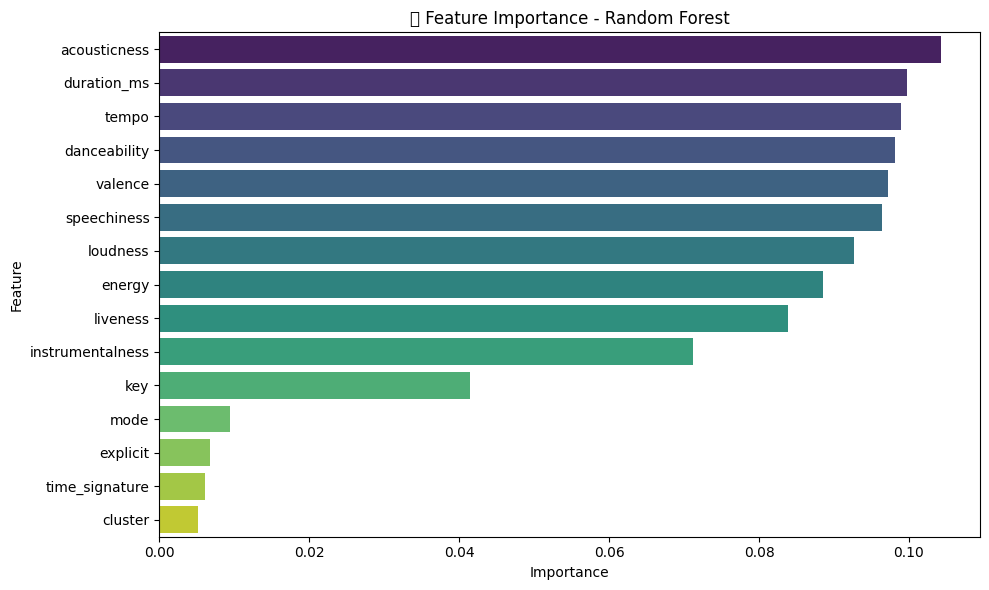

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance from Random Forest
importances = model.feature_importances_
feature_names = popularity_features

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("🔍 Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


## Boxplot of Popularity by Cluster

/tmp/ipython-input-2537650511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='popularity', data=df, palette='Set3')


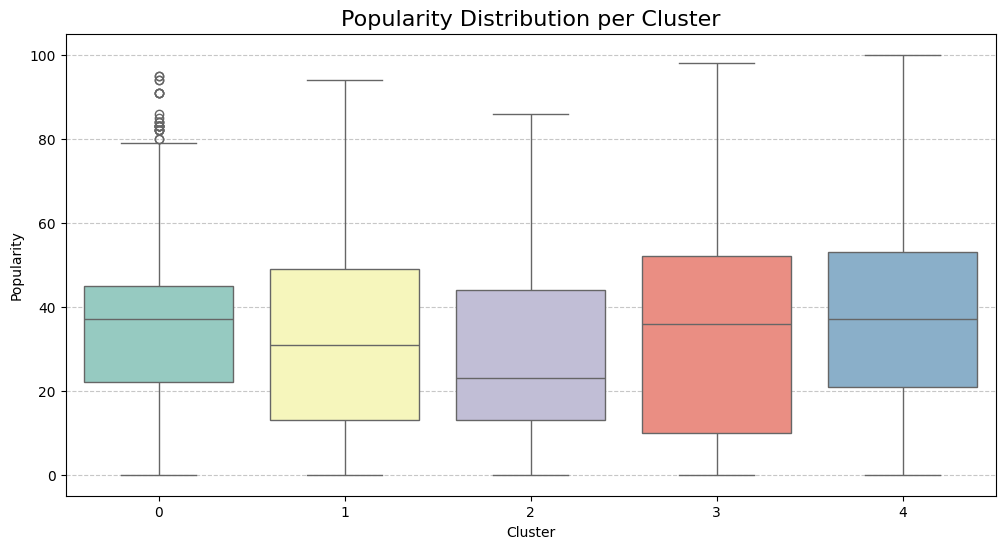

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='popularity', data=df, palette='Set3')
plt.title('Popularity Distribution per Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Popularity')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


## Key Insights:


Clusters 0, 3, and 4 have similar median popularity (~37-38) but different distribution patterns
Cluster 2 appears to represent the most niche/underground genre
Cluster 1 shows the most commercial variability, possibly representing a diverse genre like "pop" that includes both mainstream hits and lesser-known tracks
The clustering algorithm has successfully separated music into groups with distinct commercial patterns

## Feature importance analysis for Genre Classification

In [1]:
# Load the data
import pandas as pd
df= pd.read_pickle("/content/drive/MyDrive/Audio_Genre_ML/df_with_clusters.pkl")

In [2]:
selected_features = [
    'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
    'key', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
    'cluster'
]

In [3]:
super_genres = {
    'rock': ['rock', 'rock-n-roll', 'punk', 'punk-rock', 'grunge', 'psych-rock', 'hard-rock'],
    'pop': ['pop', 'indie-pop', 'synth-pop', 'pop-film', 'power-pop'],
    'electronic': ['electronic', 'edm', 'electro', 'techno', 'trance', 'dubstep', 'house', 'deep-house', 'minimal-techno'],
    'metal': ['metal', 'heavy-metal', 'death-metal', 'black-metal', 'metalcore', 'grindcore'],
    'hiphop': ['hip-hop', 'rap', 'r-n-b'],
    'japanese': ['j-pop', 'j-rock', 'j-dance', 'j-idol'],
    'latin': ['reggaeton', 'reggae', 'salsa', 'brazil', 'latino', 'samba', 'mpb', 'pagode'],
    'classical': ['classical', 'piano', 'opera', 'new-age'],
    'country': ['country', 'honky-tonk'],
    'folk': ['folk', 'acoustic', 'bluegrass'],
    'ambient': ['ambient', 'study', 'sleep', 'chill'],
    'world': ['indian', 'turkish', 'iranian', 'mandopop', 'cantopop', 'malay', 'world-music'],
    'children': ['children', 'disney', 'kids'],
    'other': ['gospel', 'funk', 'jazz', 'blues', 'soul', 'show-tunes', 'comedy']
}

In [4]:
def map_super_genre(genre):
    for super_genre, sub_genres in super_genres.items():
        if genre in sub_genres:
            return super_genre
    return 'misc'

df['super_genre'] = df['track_genre'].apply(map_super_genre)
y = df['super_genre']


In [7]:
import joblib
scaler = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/hierarchical_scaler.pkl')

In [8]:
import joblib
super_genre_model = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/super_genre_model.pkl')

## Feature Importance (Super Genre Model)

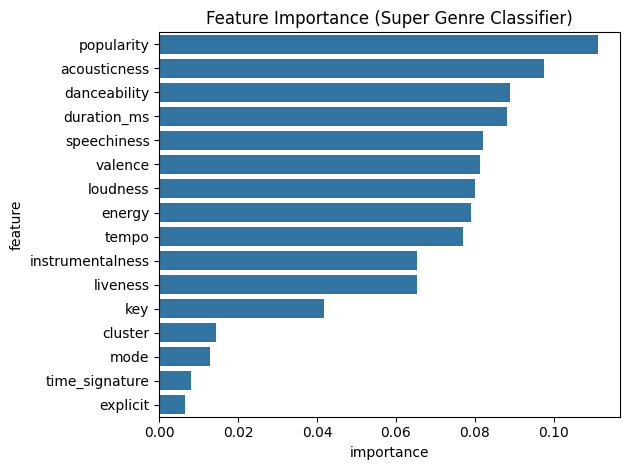

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get importance
importances = super_genre_model.feature_importances_
features_df = pd.DataFrame({'feature': selected_features, 'importance': importances})
features_df = features_df.sort_values(by='importance', ascending=False)

# Plot
sns.barplot(x='importance', y='feature', data=features_df)
plt.title('Feature Importance (Super Genre Classifier)')
plt.tight_layout()
plt.show()


##Key Insights

This suggests that super genre classification relies heavily on commercial and perceptual qualities (popularity, how acoustic/electronic it sounds, how danceable it is) rather than technical musical elements like key or time signature. The high importance of popularity is particularly interesting - it implies that commercial success patterns are strongly genre-specific, possibly reflecting different audience preferences and industry dynamics across genres.

##SHAP on Super Genre Classifier

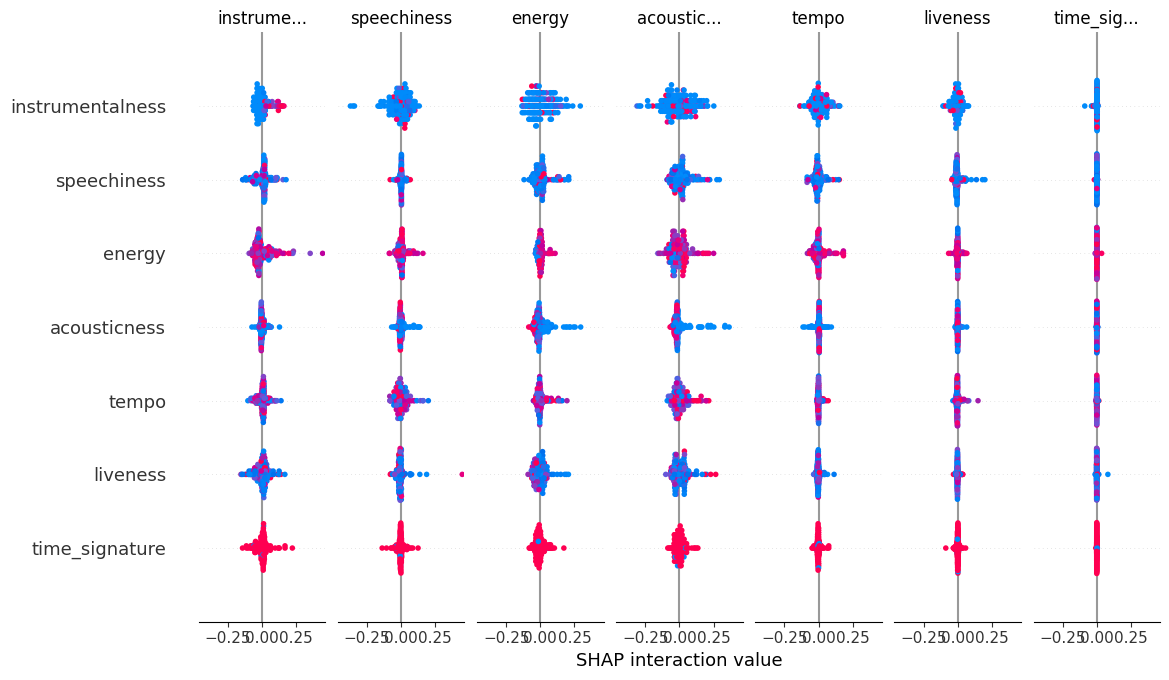

In [9]:
import shap
from sklearn.preprocessing import StandardScaler

# Create explainer
explainer = shap.TreeExplainer(super_genre_model)

# Choose a subset for explanation
X_sample = scaler.transform(df[selected_features].sample(200, random_state=42))

# Get SHAP values
shap_values = explainer.shap_values(X_sample)

# Plot
shap.summary_plot(shap_values, X_sample, feature_names=selected_features)

## Key observations:


Strong Interactions:

Instrumentalness vs Energy: Shows notable interaction patterns - likely instrumental tracks have different energy profiles than vocal tracks
Acousticness vs Energy: Clear interaction - acoustic songs typically have lower energy, so these features work together predictively
Energy vs Acousticness: The inverse relationship is confirmed in the symmetric cell

Moderate Interactions:

Tempo interactions: Tempo shows some interaction with most other features, suggesting it modifies how other characteristics are interpreted
Speechiness interactions: Particularly with instrumentalness and acousticness, which makes sense as these are somewhat opposing characteristics

Weaker Interactions:

Time signature: Shows relatively weak interactions across the board, confirming it's less important for genre classification
Liveness: Generally shows smaller interaction effects

## Interpretation:


The model learns that certain feature combinations are particularly informative for genre prediction. For example, a song that's both highly acoustic AND low energy might be more definitively classified as folk/acoustic, while the combination of high instrumentalness AND high energy might strongly suggest electronic/dance genres. These interactions help the model make more nuanced predictions than using features independently.